# Stock Versus Financial Indicators

### Import libraries and files

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import yfinance as yf

In [49]:
# Define the path to the src directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.insert(0, src_dir)

if 'data_loader' in sys.modules:
    del sys.modules['data_loader']
if 'data_cleaner' in sys.modules:
    del sys.modules['data_cleaner']
if 'indicators' in sys.modules:
    del sys.modules['indicators']
if 'financial_metrics' in sys.modules:
    del sys.modules['financial_metrics']

from data_loader import DataLoader
from data_cleaner import DataCleaner
from indicators import TechnicalIndicators
from financial_metrics import FinancialMetrics

In [50]:
# File paths 
file_paths = [
    "../data/yfinance_data/AAPL_historical_data.csv",
    "../data/yfinance_data/AMZN_historical_data.csv",
    "../data/yfinance_data/GOOG_historical_data.csv",
    "../data/yfinance_data/META_historical_data.csv",
    "../data/yfinance_data/MSFT_historical_data.csv",
    "../data/yfinance_data/NVDA_historical_data.csv",
    "../data/yfinance_data/TSLA_historical_data.csv",
]

market_index_path = "../data/yfinance_data/SPY_historical_data.csv"


### Download SPY data , Load and Process historical data

In [51]:
def download_spy_data(start="2010-01-01", end="2023-12-31"):
    """Download S&P 500 (SPY) data if it doesn't exist."""
    if not os.path.exists(market_index_path):
        print("Downloading S&P 500 (SPY) data...")
        spy_data = yf.download("SPY", start=start, end=end)
        os.makedirs(os.path.dirname(market_index_path), exist_ok=True)
        spy_data.to_csv(market_index_path)
        print("S&P 500 (SPY) data downloaded and saved.")
    else:
        print("S&P 500 (SPY) data already exists.")

def load_and_process_data():
    """Load and process the stock data and market index."""
    # Download SPY data if it doesn't exist
    download_spy_data()
    
    # load data
    loader = DataLoader(file_paths)
    data = loader.load_data()

    # clean data
    cleaner = DataCleaner()
    cleaned_data = {ticker: cleaner.clean_data(df) for ticker, df in data.items()}
    data = cleaned_data
    
    market_data = pd.read_csv(market_index_path, index_col='Date', parse_dates=True)
    market_returns = market_data['Close'].pct_change().dropna()
    
    indicators = TechnicalIndicators(data)
    indicators.calculate_moving_average()
    indicators.calculate_rsi()
    indicators.calculate_macd()
    
    metrics = FinancialMetrics(data)
    for ticker in data.keys():
        data[ticker]['Returns'] = data[ticker]['Close'].pct_change()
        data[ticker]['Cumulative Returns'] = (1 + data[ticker]['Returns']).cumprod()
    
    return data, market_returns

### Plot Stock Price and Volume for Each Ticker

In [52]:
def plot_stock_price(data, ticker):
    """Plot the stock price and volume for a given ticker."""
    stock_data = data[ticker]
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    ax1.plot(stock_data.index, stock_data['Close'], label='Close Price')
    ax1.set_title(f'{ticker} Stock Price and Volume')
    ax1.set_ylabel('Price')
    ax1.legend()
    
    ax2.bar(stock_data.index, stock_data['Volume'], label='Volume')
    ax2.set_ylabel('Volume')
    ax2.set_xlabel('Date')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()



### Technical Indicators and Returns Comparison

In [ ]:
def plot_technical_indicators(data, ticker):
    """Plot technical indicators for a given ticker."""
    stock_data = data[ticker]
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
    
    ax1.plot(stock_data.index, stock_data['Close'], label='Close Price')
    # ax1.plot(stock_data.index, stock_data['MA_50'], label='50-day MA')
    ax1.set_title(f'{ticker} Technical Indicators')
    ax1.set_ylabel('Price')
    ax1.legend()
    
    ax2.plot(stock_data.index, stock_data['RSI'], label='RSI')
    ax2.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
    ax2.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
    ax2.set_ylabel('RSI')
    ax2.legend()
    
    ax3.plot(stock_data.index, stock_data['MACD'], label='MACD')
    # ax3.plot(stock_data.index, stock_data['Signal'], label='Signal Line')
    # ax3.bar(stock_data.index, stock_data['MACD_Histogram'], label='MACD Histogram')
    ax3.set_ylabel('MACD')
    ax3.set_xlabel('Date')
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

def plot_returns_comparison(data):
    """Plot cumulative returns comparison for all stocks."""
    plt.figure(figsize=(12, 6))
    for ticker, stock_data in data.items():
        plt.plot(stock_data.index, stock_data['Cumulative Returns'], label=ticker)
    
    plt.title('Cumulative Returns Comparison')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

### Correlation Heatmap and Metrics Table

In [ ]:
def plot_correlation_heatmap(data):
    """Plot correlation heatmap of stock returns."""
    returns = pd.DataFrame({ticker: stock_data['Returns'] for ticker, stock_data in data.items()})
    corr_matrix = returns.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Heatmap of Stock Returns')
    plt.show()

def display_metrics_table(data, market_returns):
    """Display a table of financial metrics for all stocks."""
    metrics = FinancialMetrics(data)
    sharpe_ratios = metrics.calculate_sharpe_ratio()
    volatilities = metrics.calculate_volatility()
    betas = metrics.calculate_beta(market_returns)
    
    metrics_df = pd.DataFrame({
        'Sharpe Ratio': sharpe_ratios,
        'Volatility': volatilities,
        'Beta': betas
    })
    
    display(HTML(metrics_df.to_html()))

### Execute Data Processing and Visualizations

S&P 500 (SPY) data already exists.
Financial Metrics:


e:\Studies\tenx\w1\venv\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
e:\Studies\tenx\w1\venv\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
e:\Studies\tenx\w1\src\financial_metrics.py:83: RuntimeWarning: Degrees of freedom <= 0 for slice
  market_variance = np.var(aligned_returns[1])
e:\Studies\tenx\w1\venv\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
e:\Studies\tenx\w1\venv\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Sharpe Ratio,Volatility,Beta
AAPL,0.038450,0.014266,NaN
AMZN,0.048431,0.017436,NaN
GOOG,0.053241,0.017196,NaN
META,0.051885,0.023030,NaN
MSFT,0.051624,0.012393,NaN
NVDA,0.051038,0.029733,NaN
TSLA,0.056727,0.033623,NaN



Visualizations for AAPL:


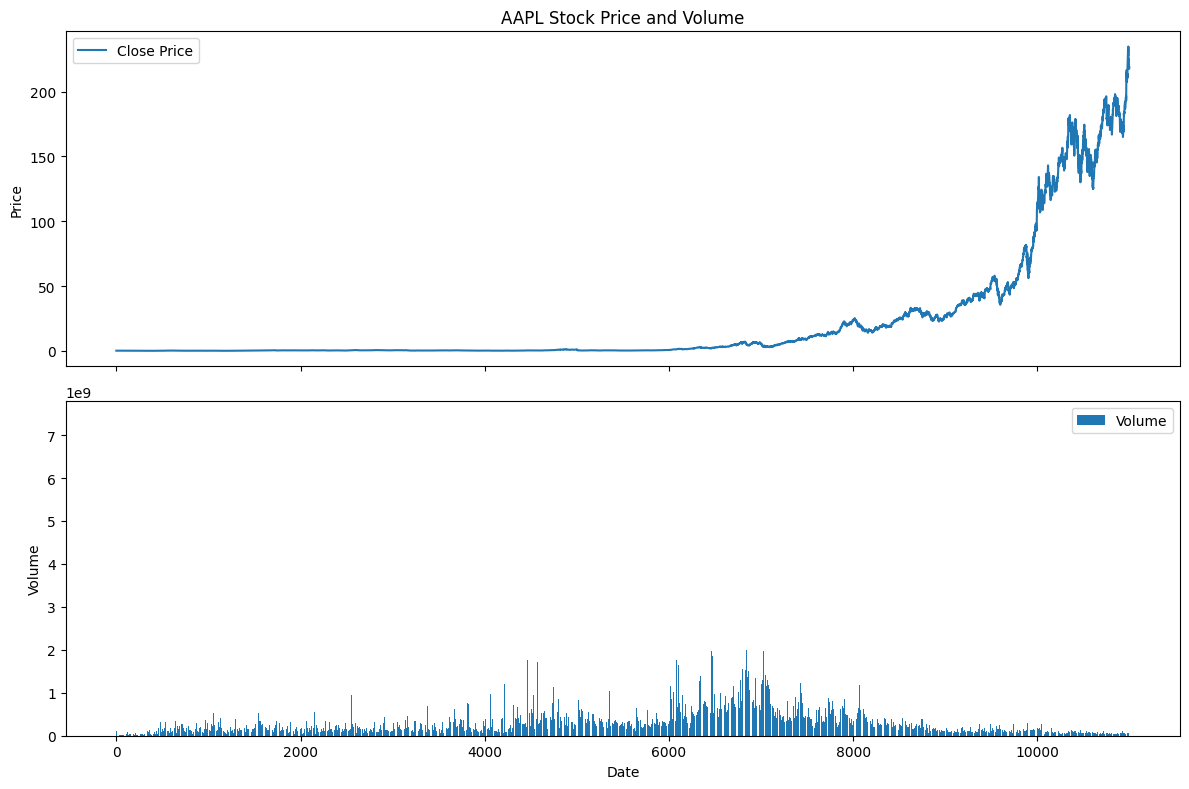

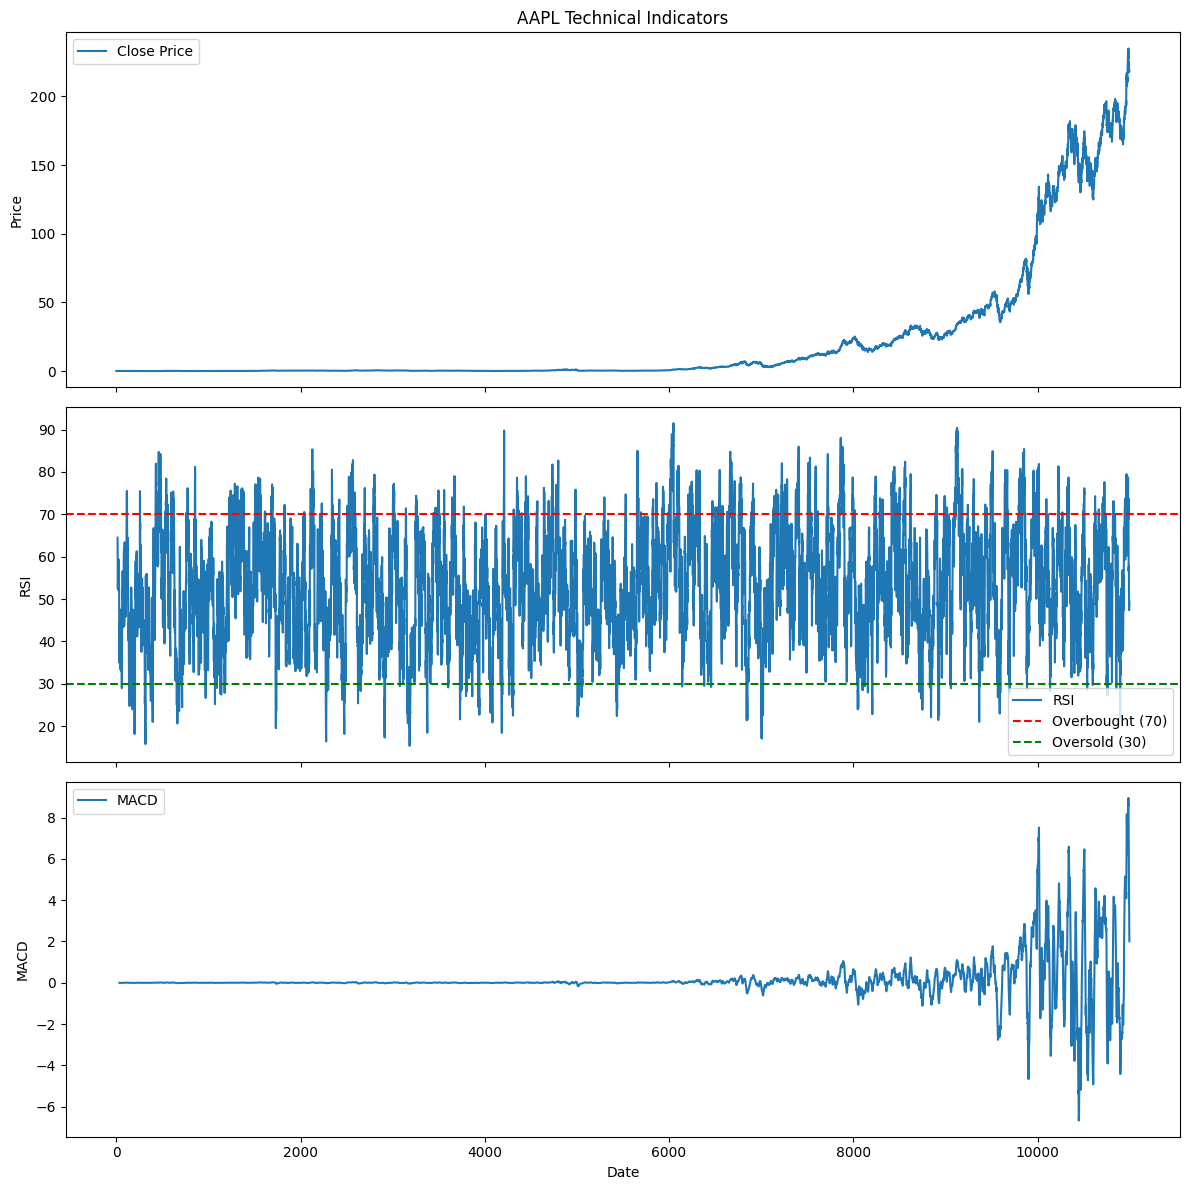


Visualizations for AMZN:


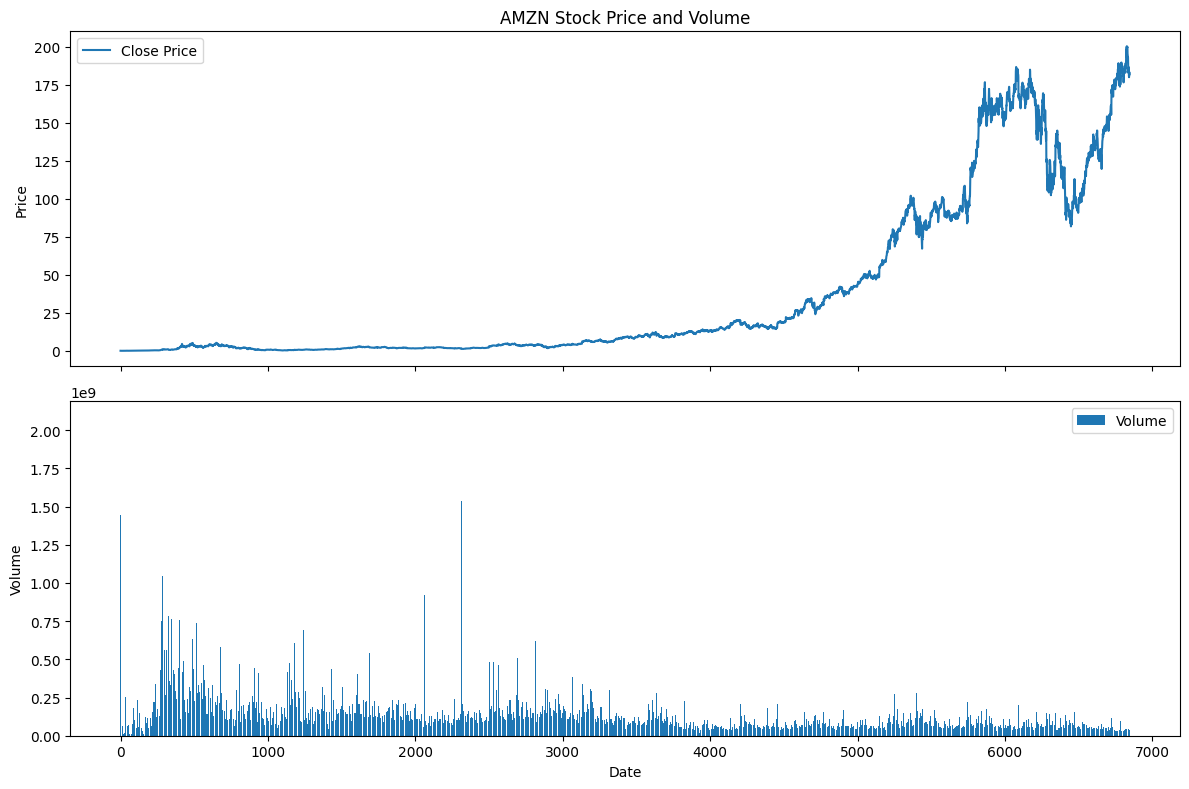

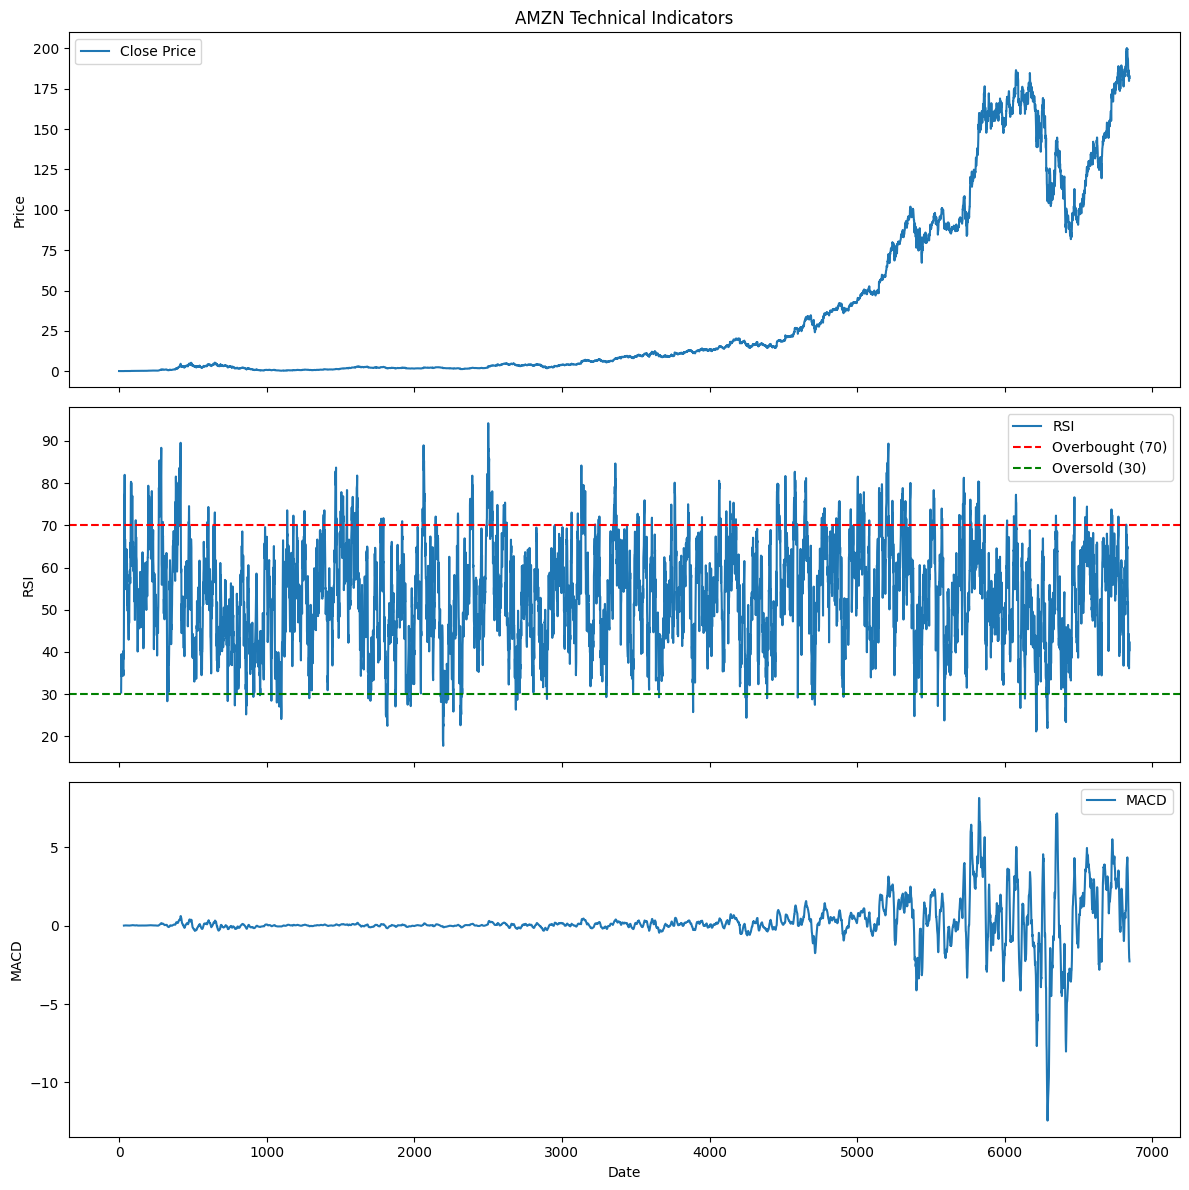


Visualizations for GOOG:


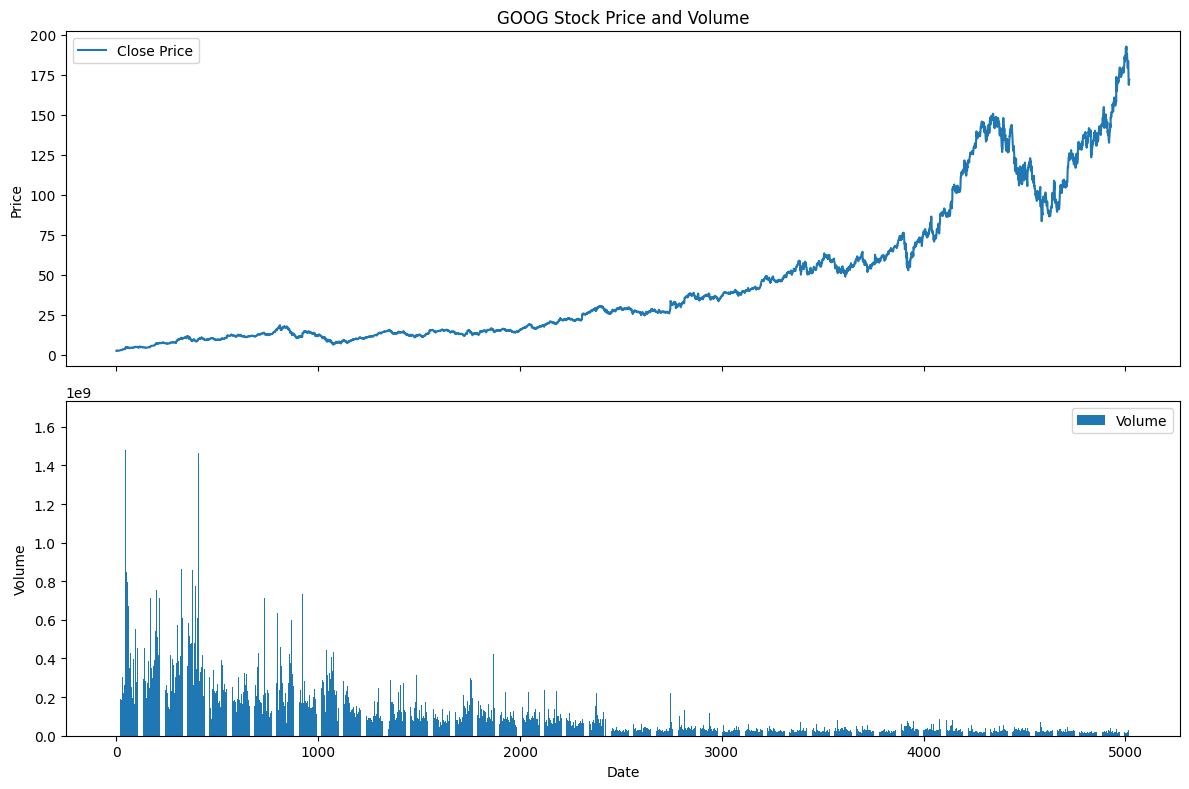

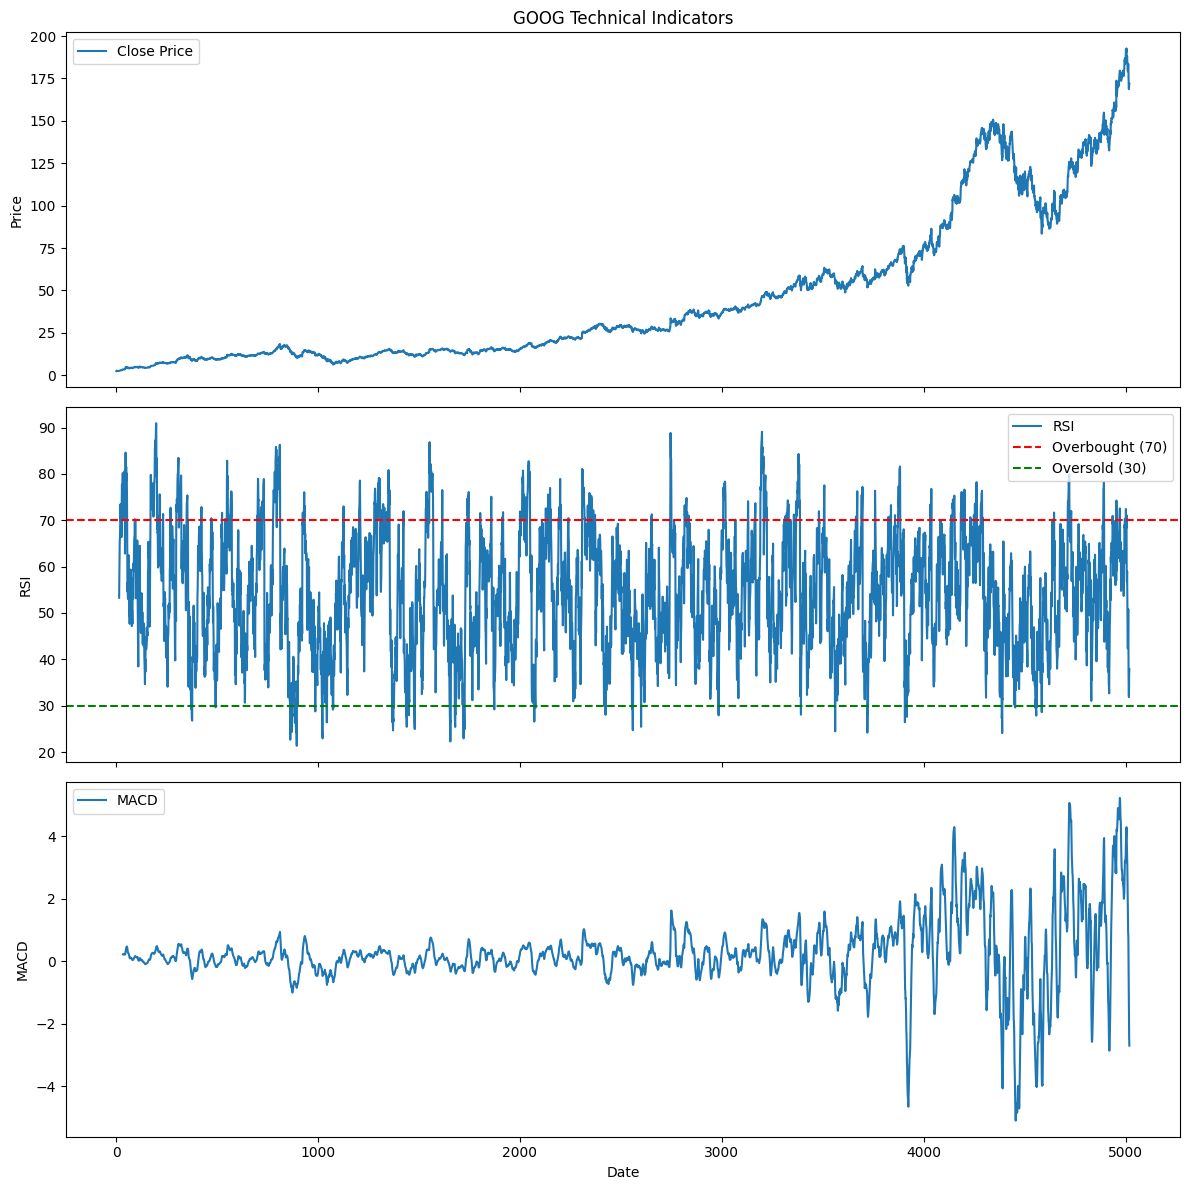


Visualizations for META:


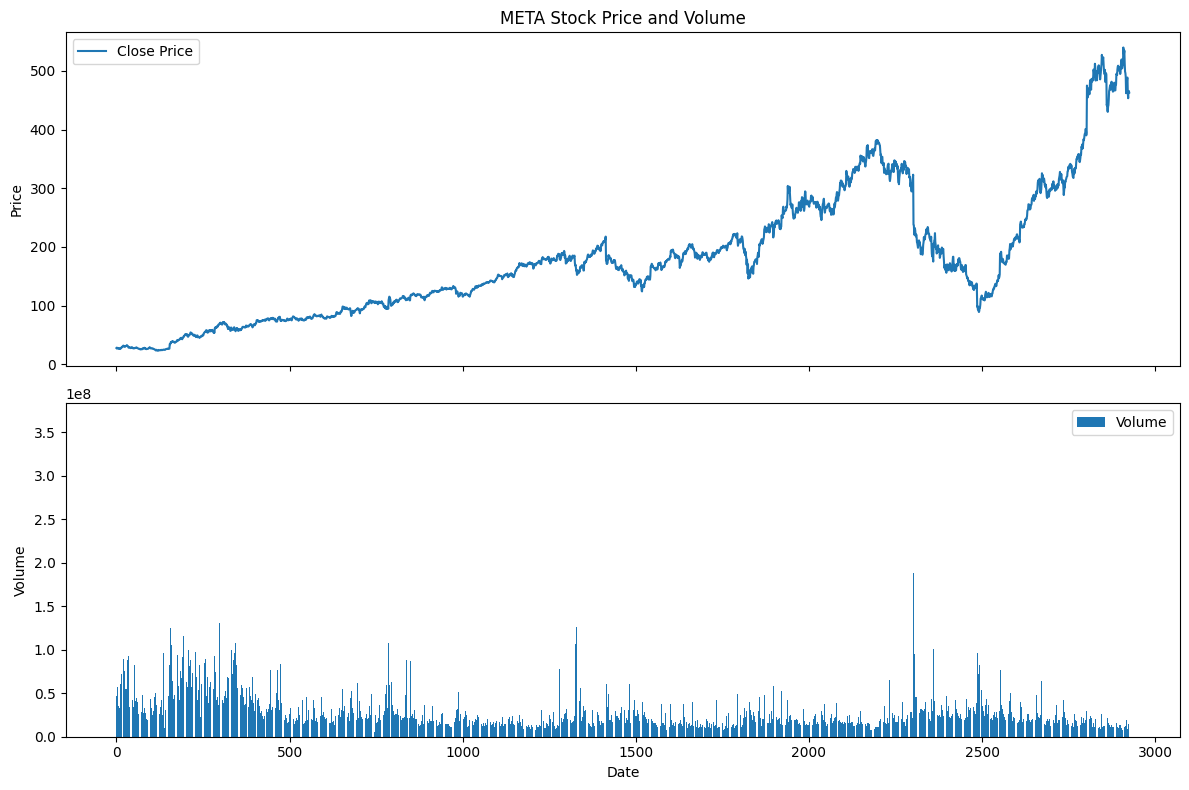

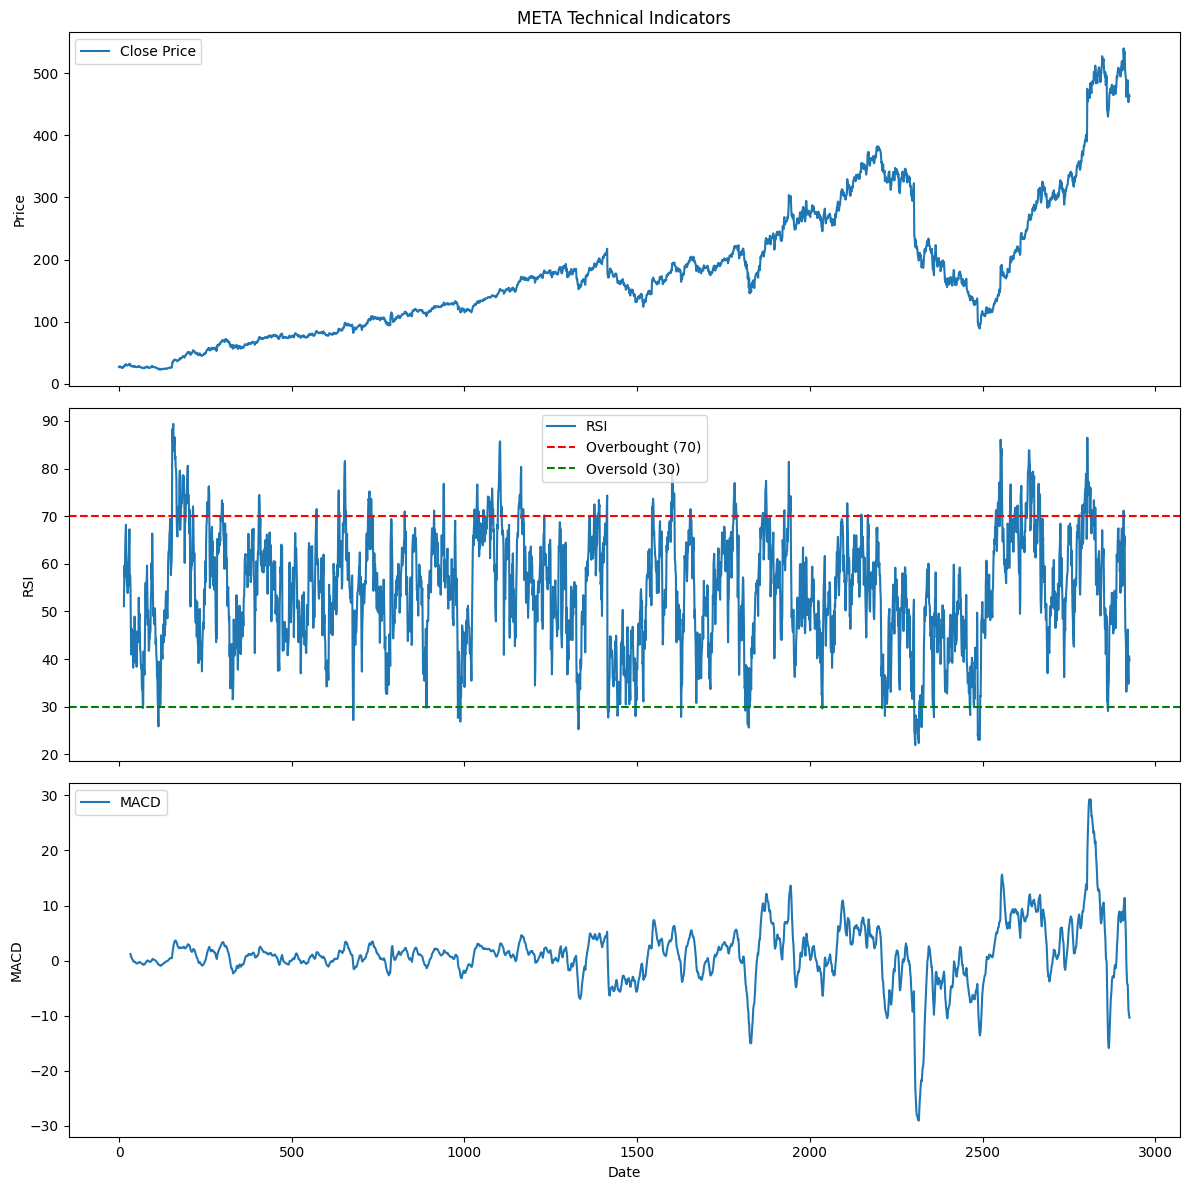


Visualizations for MSFT:


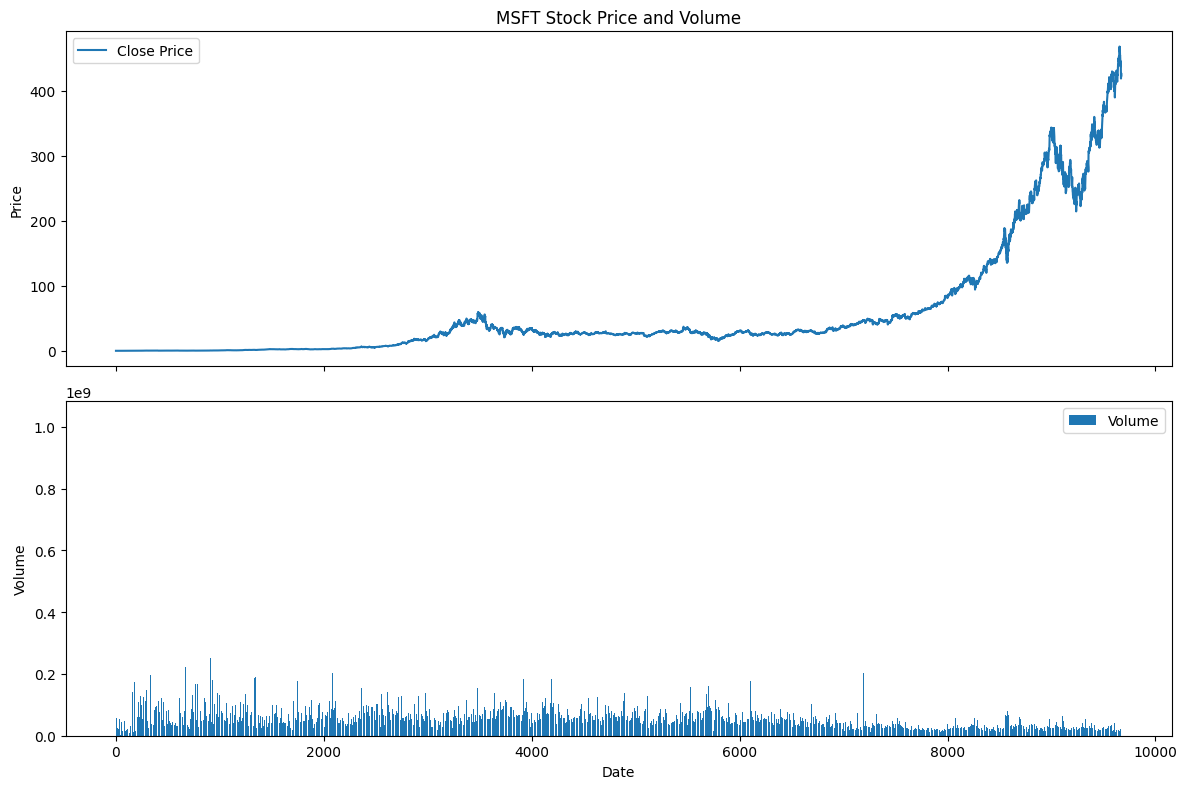

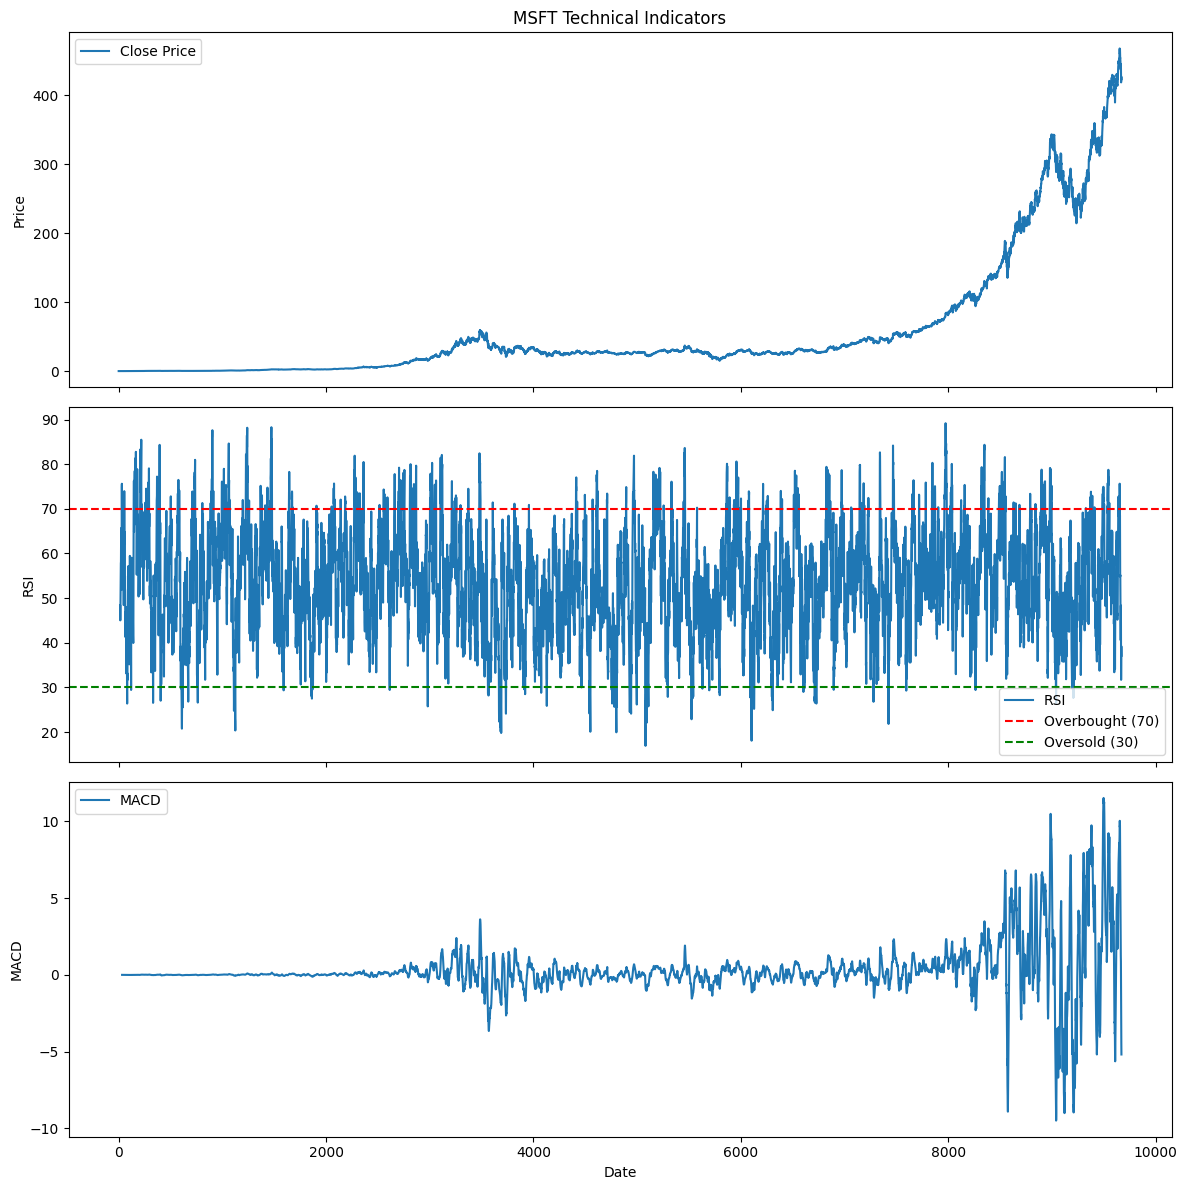


Visualizations for NVDA:


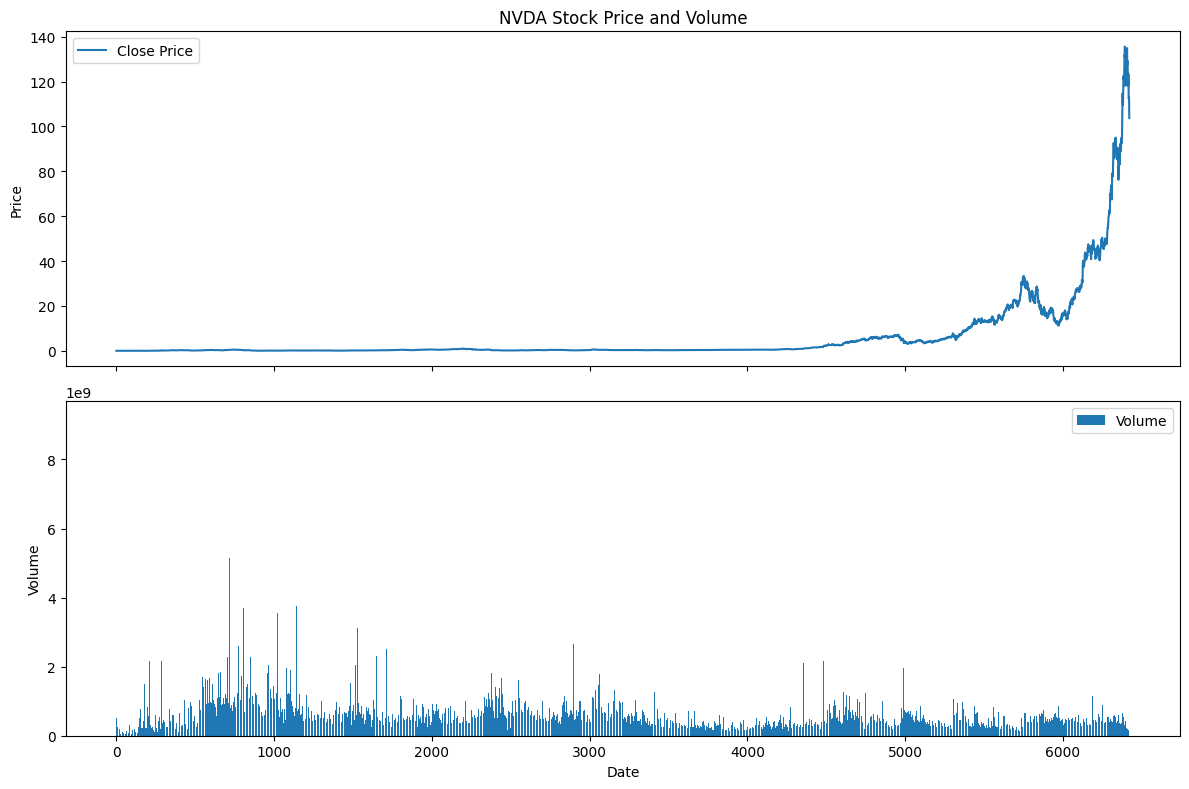

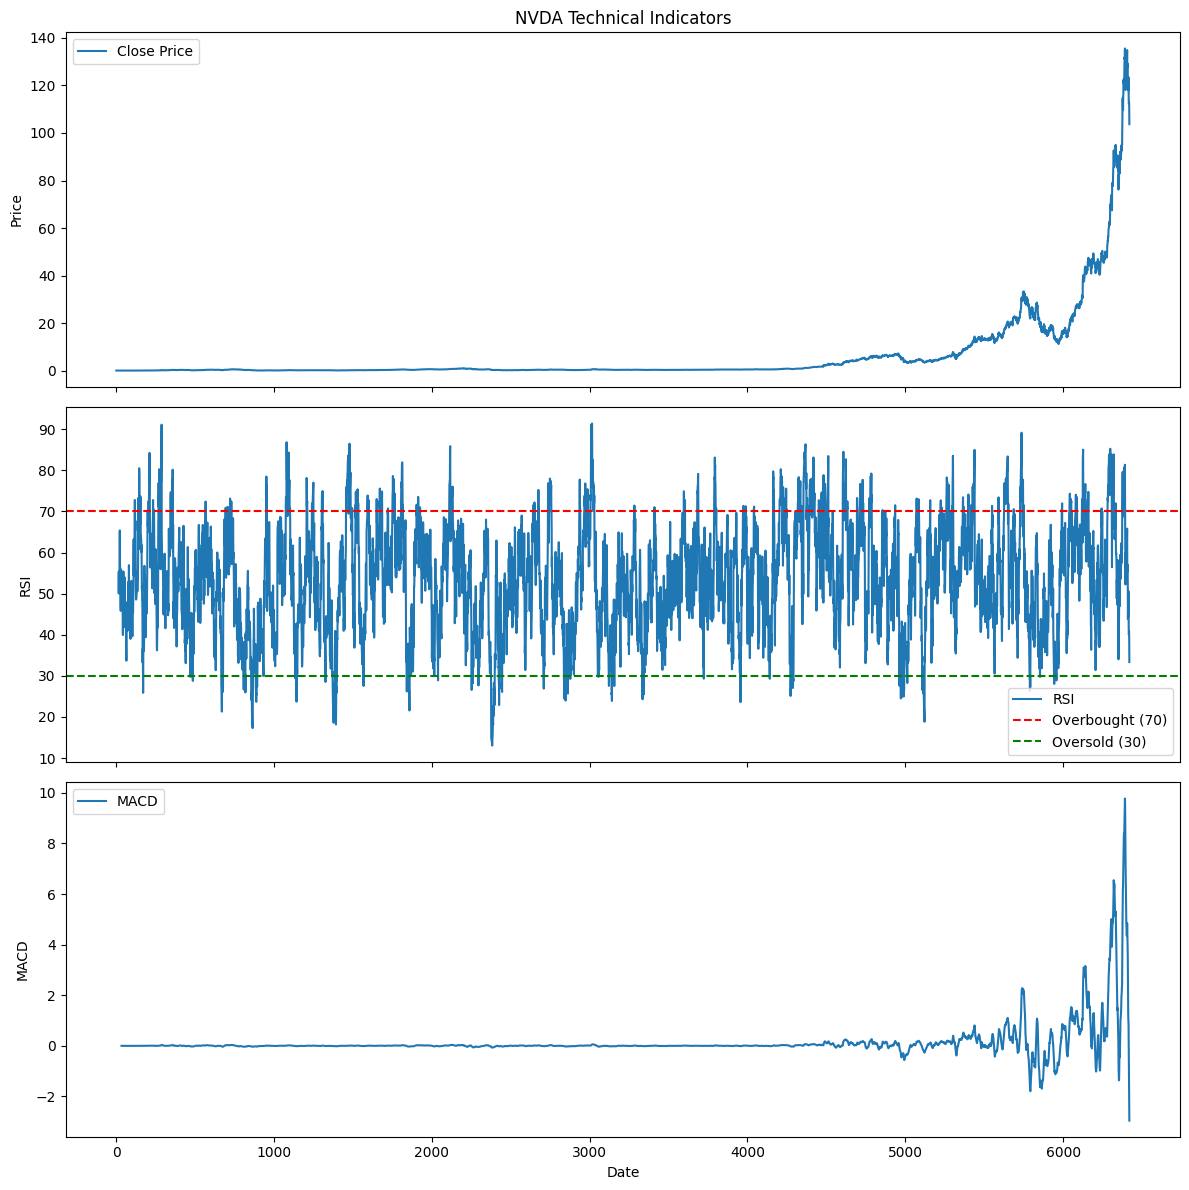


Visualizations for TSLA:


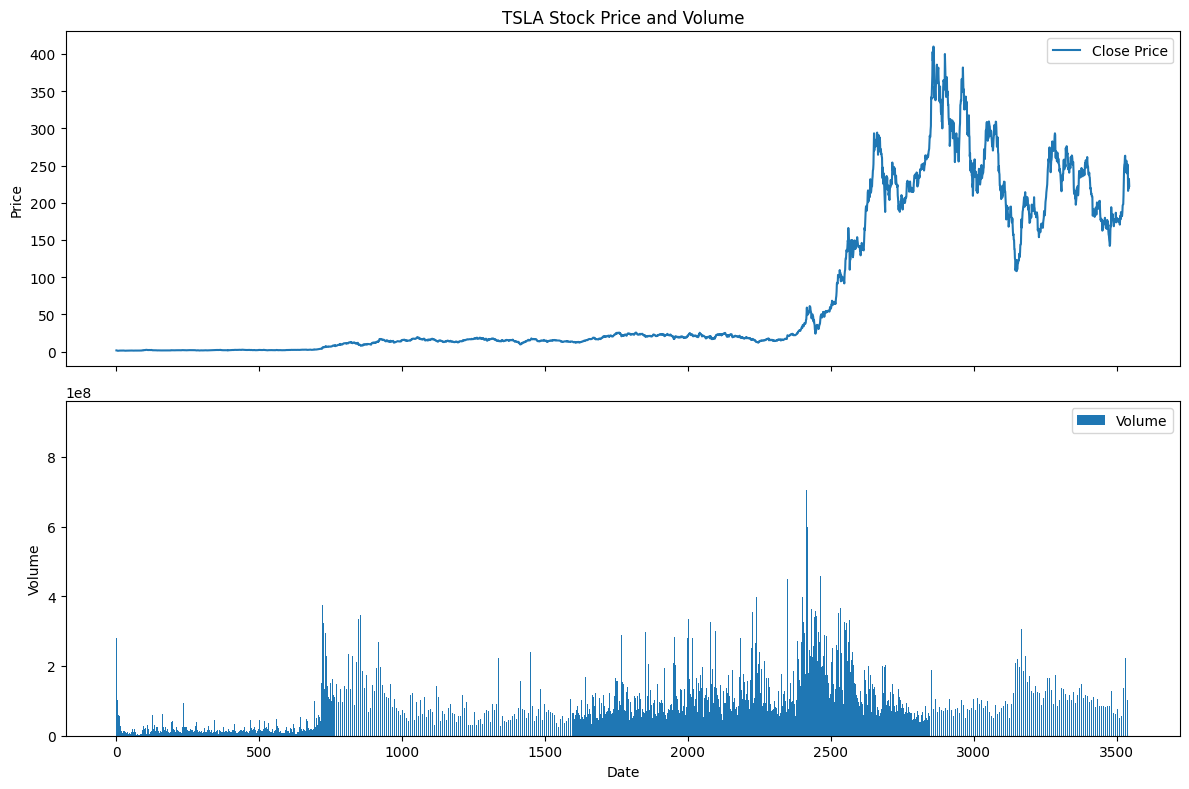

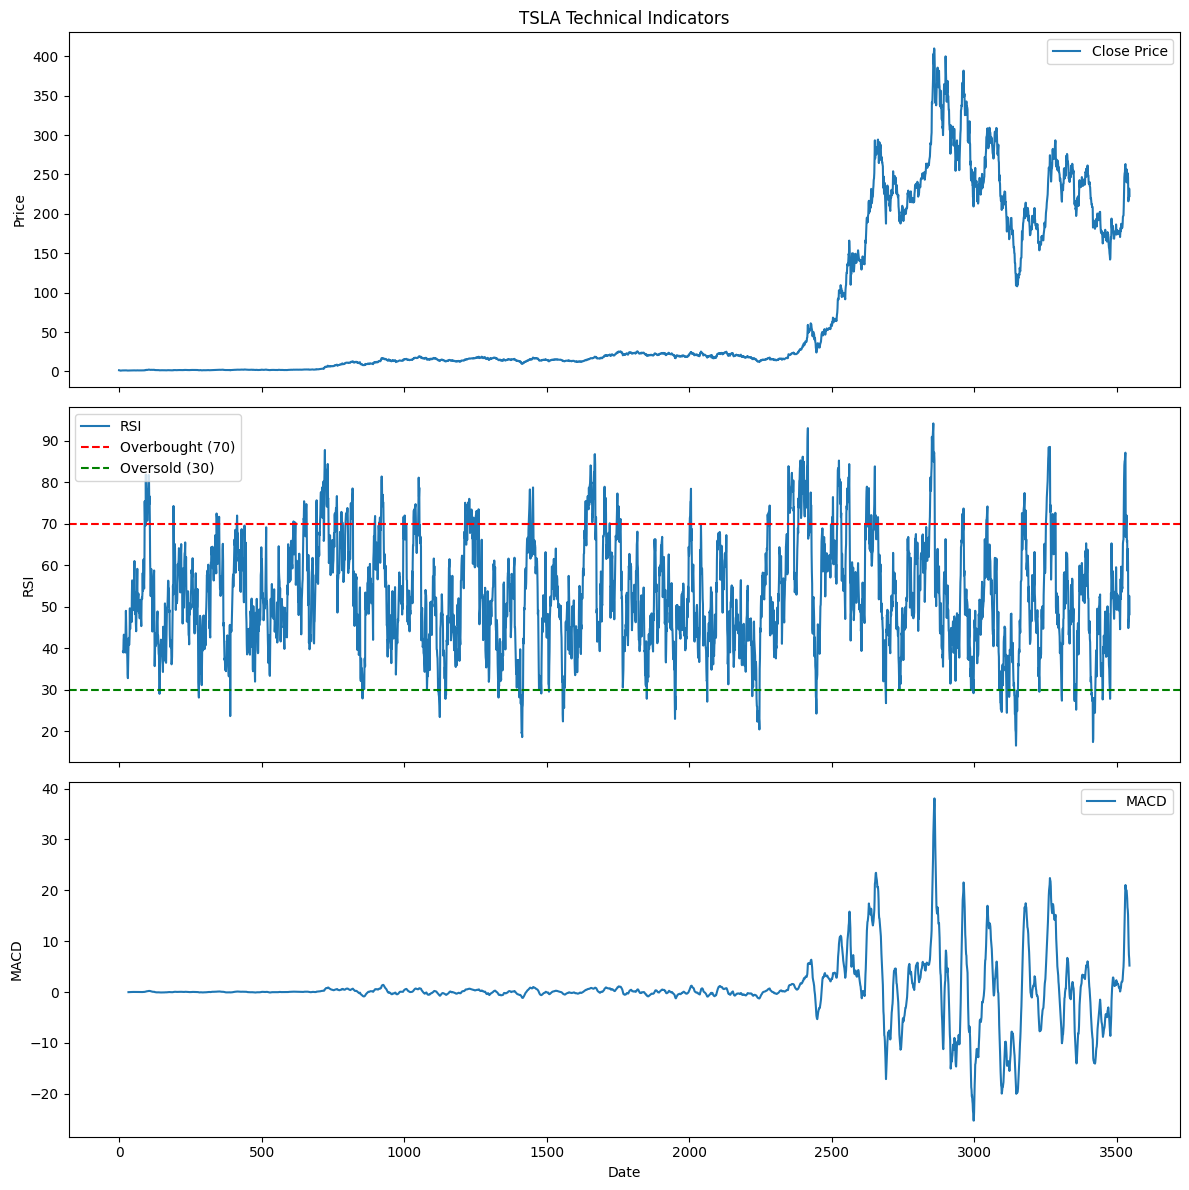


Stock Comparisons:


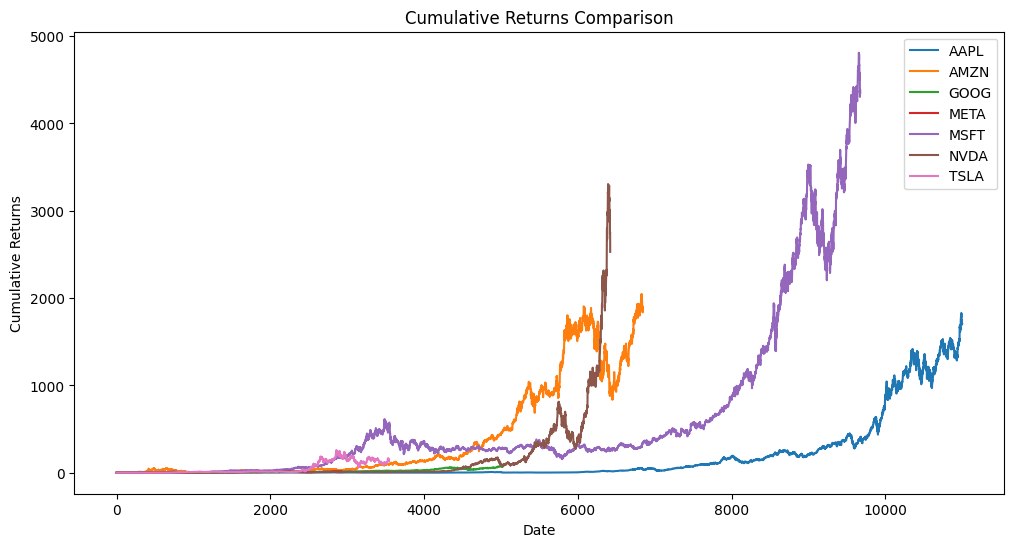

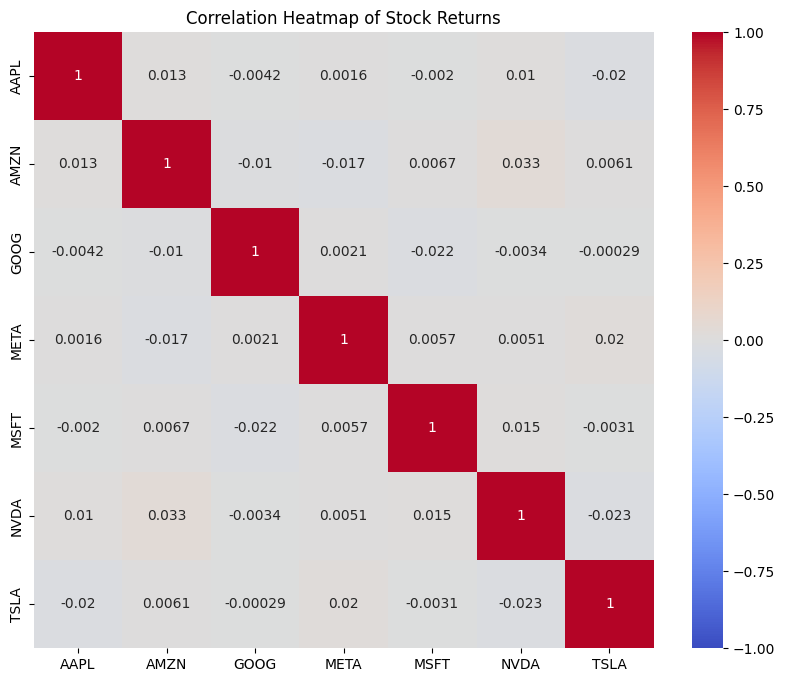

In [53]:
# Main execution
data, market_returns = load_and_process_data()

# Display metrics table
print("Financial Metrics:")
display_metrics_table(data, market_returns)

# Plot visualizations for each stock
for ticker in data.keys():
    print(f"\nVisualizations for {ticker}:")
    plot_stock_price(data, ticker)
    plot_technical_indicators(data, ticker)

# Plot comparisons across all stocks
print("\nStock Comparisons:")
plot_returns_comparison(data)
plot_correlation_heatmap(data)